In [ ]:
# imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from whatsappnalysis.lib.custom_types import ChatDataset
from whatsappnalysis.pipeline import PIPELINE_CONFIG
from whatsappnalysis.lib.analysis.feature_adder import schema

config = deepcopy(PIPELINE_CONFIG)
config.root_dir = "../"

In [ ]:
# Load data
dataset = ChatDataset(schema).load_from_parquet(config.features_chat_parquet_path)
data = dataset.data

In [ ]:
# create categoricals
authors = data[schema.columns.AUTHOR.name].unique()
data[schema.columns.AUTHOR.name] = pd.Categorical(
    data[schema.columns.AUTHOR.name],
    categories=authors
)

In [ ]:
data.describe()

In [ ]:
# Messages count by author
author_counts = []
for author, author_data in data.groupby(schema.columns.AUTHOR.name):
    author_counts.append({
        schema.columns.AUTHOR.name: author,
        "MESSGAE_COUNT": len(author_data),
        "AVERAGE_SENTIMENT": author_data[schema.columns.OVERALL_POLARITY.name].mean()
    })

author_data = pd.DataFrame.from_records(author_counts)
author_data.sort_values(by="MESSGAE_COUNT")


In [ ]:
print(data.dtypes)

In [ ]:
# polarity by author
sns.displot(
    data,
    hue=schema.columns.AUTHOR.name,
    x=schema.columns.OVERALL_POLARITY.name,
    kind="kde"
)
plt.xlabel("message sentiment")
plt.show()

In [ ]:
# Resample data
rolled_data_list = []
for author, author_data in data.groupby(schema.columns.AUTHOR.name):
    rolled_author_data = author_data.resample(
        "1W",
        on=schema.columns.TIMESTAMP.name,
    ).mean()
    rolled_author_data[schema.columns.AUTHOR.name] = author
    rolled_author_data.reset_index(inplace=True)
    rolled_data_list.append(rolled_author_data)
    
rolled_data = pd.concat(rolled_data_list)
rolled_data.head()

In [ ]:
# Polarity by author over time
sns.lineplot(
    data=rolled_data,
    x=schema.columns.TIMESTAMP.name,
    y=schema.columns.OVERALL_POLARITY.name,
    hue=schema.columns.AUTHOR.name
)
plt.xticks(rotation=45)

plt.show()

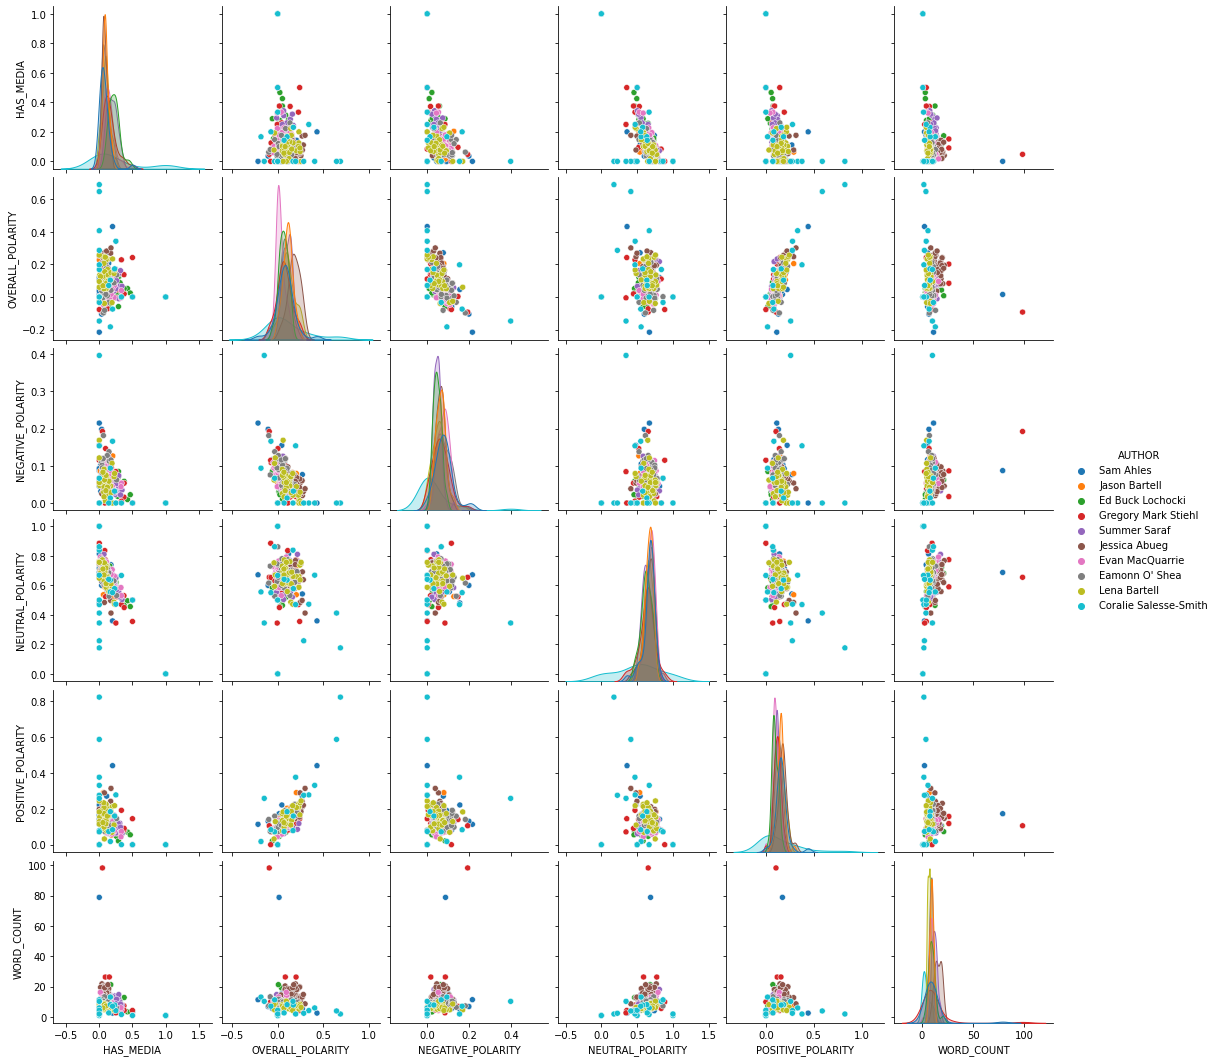

In [11]:
sns.pairplot(
    data=rolled_data,
    hue=schema.columns.AUTHOR.name
)

plt.show()

In [ ]:
# polarity correlation
author_data = rolled_data.pivot(
    columns=[schema.columns.AUTHOR.name]
)


authors = data[schema.columns.AUTHOR.name].cat.categories
sns.scatterplot(
    data=author_data[schema.columns.OVERALL_POLARITY.name],
    x=authors[0],
    y=authors[1]
)
R = author_data[schema.columns.OVERALL_POLARITY.name].corr().iloc[0,1]
plt.title(f"Overall sentiment\nR: {R:0.3f}")
plt.show()


In [ ]:
# Very low/high polarity examples
for author in authors:

    author_data = data[
        data[schema.columns.AUTHOR.name] == author
    ]
    sorted_author_data = author_data.sort_values(by=schema.columns.OVERALL_POLARITY.name)
    
    most_positive_message = sorted_author_data.iloc[-1][schema.columns.MESSAGE.name]
    most_negative_message = sorted_author_data.iloc[0][schema.columns.MESSAGE.name]
    
    print(f"Author: {author}")
    print(f"**Positive message:\n{most_positive_message}\n\n")
    print(f"**Negative message:\n{most_negative_message}\n\n")
    print("\n\n")

In [ ]:
# most and least positive messages


In [ ]:
# Resample data
rolled_data_list = []
for author, author_data in data.groupby(schema.columns.AUTHOR.name):
    rolled_author_data = author_data.resample(
        "1H",
        on=schema.columns.TIMESTAMP.name,
    ).sum()
    rolled_author_data[schema.columns.AUTHOR.name] = author
    rolled_author_data.reset_index(inplace=True)
    rolled_data_list.append(rolled_author_data)
    
rolled_data = pd.concat(rolled_data_list)
rolled_data.head()
# Word count over time
sns.lineplot(
    data=rolled_data,
    x=schema.columns.TIMESTAMP.name,
    y=schema.columns.WORD_COUNT.name,
    hue=schema.columns.AUTHOR.name
)
plt.xticks(rotation=45)

plt.show()